## Example notebook for the %%stata cell magic by the IPyStata package. 

**Author:**   Ties de Kok <t.c.j.dekok@tilburguniversity.edu>  
**Twitter:** @TiesdeKok <https://twitter.com/TiesdeKok/>  
**Homepage:**    https://github.com/TiesdeKok/ipystata  
**PyPi:** https://pypi.python.org/pypi/ipystata  

## Note: this example notebook uses the Windows only `Stata Automation` mode

See Github for an example notebook that uses the `Stata Batch Mode` (supported for Windows, Mac OS X, and Linux).

## Import packages

In [1]:
import pandas as pd

In [2]:
import ipystata

## Configure ipystata

Make sure that you have registered your Stata instance. (See GitHub for instructions). 

## Check whether IPyStata is working

In [3]:
%%stata

display "Hello, I am printed by Stata."


Hello, I am printed by Stata.


# Some examples based on the Stata 13 manual

## Load the dataset "auto.dta" in Stata return it back to Python as a Pandas dataframe

The code cell below runs the Stata command **`sysuse auto.dta`** to load the dataset and returns it back to Python via the **`-o car_df`** argument.

In [4]:
%%stata -o car_df
sysuse auto.dta


(1978 Automobile Data)


**`car_df`** is a regular Pandas dataframe on which Python / Pandas actions can be performed. 

In [5]:
car_df.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


## Basic descriptive statistics

The argument **`-d or --data`** is used to define which dataframe should be set as dataset in Stata.  
In the example below the Stata function **`tabulate`** is used to generate some descriptive statistics for the dataframe **`car_df`**.

In [6]:
%%stata -d car_df
tabulate foreign headroom


           |                                        headroom
   foreign |       1.5          2        2.5          3        3.5          4        4.5          5 |     Total
-----------+----------------------------------------------------------------------------------------+----------
  Domestic |         3         10          4          7         13         10          4          1 |        52 
   Foreign |         1          3         10          6          2          0          0          0 |        22 
-----------+----------------------------------------------------------------------------------------+----------
     Total |         4         13         14         13         15         10          4          1 |        74 


These descriptive statistics can be replicated in Pandas using the **`crosstab`** fuction, see the code below.

In [7]:
pd.crosstab(car_df['foreign'], car_df['headroom'], margins=True)

headroom,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,All
foreign,,,,,,,,,
Domestic,3,10,4,7,13,10,4,1,52
Foreign,1,3,10,6,2,0,0,0,22
All,4,13,14,13,15,10,4,1,74


## Stata graphs

If you want to get a Stata graph as an output of your IPyStata cell you can use the **`-gr` or `--graph`** argument.  
This will only work for one graph per cell (it will display the most recent graph). 


(highschool and beyond (200 cases))


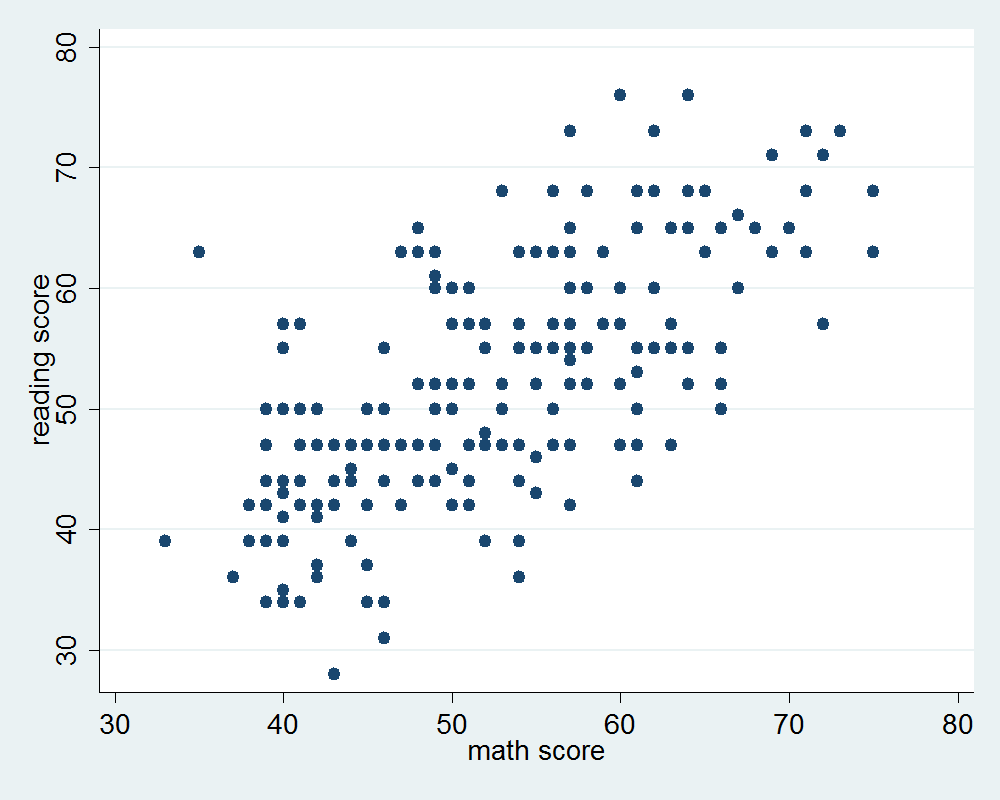

In [8]:
%%stata -s graph_session --graph
use http://www.ats.ucla.edu/stat/stata/notes/hsb2, clear
graph twoway scatter read math

## Use Python lists as Stata macros

In many situations it is convenient to define values or variable names in a Python list or equivalently in a Stata macro.  
The **`-i or --input`** argument makes a Python list available for use in Stata as a local macro.  
For example, **`-i main_var`** converts the Python list **`['mpg', 'rep78']`** into the following Stata macro: **``main_var'`**.

In [9]:
main_var = ['mpg', 'rep78']
control_var = ['gear_ratio', 'trunk', 'weight', 'displacement']

In [10]:
%%stata -i main_var -i control_var -os

display "`main_var'"
display "`control_var'"

regress price `main_var' `control_var', vce(robust)


mpg rep78
gear_ratio trunk weight displacement

Linear regression                               Number of obs     =         69
                                                F(6, 62)          =       8.60
                                                Prob > F          =     0.0000
                                                R-squared         =     0.4124
                                                Root MSE          =     2338.1

------------------------------------------------------------------------------
             |               Robust
       price |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         mpg |  -76.95578   84.95038    -0.91   0.369    -246.7692     92.8576
       rep78 |   899.0818   299.7541     3.00   0.004      299.882    1498.282
  gear_ratio |   1479.744   917.5363     1.61   0.112    -354.3846    3313.873
       trunk |  -110.3163   80.16622    -1.38

## Modify dataset in Stata and return it to Python

It is possible create new variables or modify the existing dataset in Stata and have it returned as a Pandas dataframe.  
In the example below the output **`-o car_df`** will overwrite the **`car_df`** previously created.  
Note, the argument **`-np or --noprint`** can be used to supress any output below the code cell.

In [11]:
%%stata -o car_df -np
generate weight_squared = weight^2
generate log_weight = log(weight)

In [12]:
car_df.head(3)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,weight_squared,log_weight
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic,8584900.0,7.982758
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic,11222500.0,8.116715
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic,6969600.0,7.878534


## Retrieve macro from Stata back into Python

The **`-gm`** or **`--getmacro`** argument allows a macro to be extracted from a Stata session. The macro will be added to the **`macro_dict`** dictionary.

In [13]:
%%stata -s macro_example -gm macro_1 -gm macro_2
local macro_1 one two
local macro_2 three four

Several (2x) macros have been added to the dictionary: macro_dict




In [14]:
macro_dict

{'macro_1': ['one', 'two'], 'macro_2': ['three', 'four']}

In [15]:
macro_dict['macro_1']

['one', 'two']

## Set Python working directory in Stata 

In [16]:
import os
os.chdir(r'C:/')

In [17]:
%%stata -cwd
display "`c(pwd)'"

Set the working directory of Stata to: C:\

C:


## Using Mata code

In [18]:
%%stata -s mata_session
sysuse auto


(1978 Automobile Data)


In [19]:
%%stata --mata -s mata_session
y    = st_data(., "price")
X    = st_data(., "mpg trunk")
n    = rows(X)
X    = X,J(n,1,1)
XpX  = quadcross(X, X)
XpXi = invsym(XpX)
b    = XpXi*quadcross(X, y)
b'

Mata output:

                  1              2              3
    +----------------------------------------------+
  1 |  -220.1648801    43.55851009    10254.94983  |
    +----------------------------------------------+


## Using Sessions

IPyStata 0.2 introduces the possibility to use many different Stata sessions that by default run in the background.  
These sessions are defined using the **`-s`** or **`--session`** arguments. 

### Session example 1

In [20]:
%%stata -s session_1 -np
local session Hello I am session 1 and I am persistent

In [21]:
%%stata -s session_2 -np
local session Hello I am session 2 and I am persistent

In [22]:
%%stata -s session_1
display "`session'"


Hello I am session 1 and I am persistent


In [23]:
%%stata -s session_2
display "`session'"


Hello I am session 2 and I am persistent


### Session example 2

In this example a logistic regression is performed in one cell and a postestimation (predict) is performed on this regression in the next cell.

In [24]:
%%stata -s auto_session
sysuse auto
logit foreign weight mpg


(1978 Automobile Data)

Iteration 0:   log likelihood =  -45.03321  
Iteration 1:   log likelihood = -29.238536  
Iteration 2:   log likelihood = -27.244139  
Iteration 3:   log likelihood = -27.175277  
Iteration 4:   log likelihood = -27.175156  
Iteration 5:   log likelihood = -27.175156  

Logistic regression                             Number of obs     =         74
                                                LR chi2(2)        =      35.72
                                                Prob > chi2       =     0.0000
Log likelihood = -27.175156                     Pseudo R2         =     0.3966

------------------------------------------------------------------------------
     foreign |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      weight |  -.0039067   .0010116    -3.86   0.000    -.0058894    -.001924
         mpg |  -.1685869   .0919175    -1.83   0.067    -.3487418     

In [25]:
%%stata -s auto_session
predict probhat
summarize probhat


(option pr assumed; Pr(foreign))

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     probhat |         74    .2972973    .3052979    .000729   .8980594


## Session manager tools

In order to avoid using unnecessary system resources several tools and automatic cleanup routines are included.

### Display all active Stata sessions:

In [26]:
%%stata
sessions

The following sessions have been found:
main [active]
mata_session [active]
session_1 [active]
graph_session [active]
auto_session [active]
session_2 [active]
macro_example [active]


### Reveal all Stata sessions

In [27]:
%%stata
reveal all

Revealed 7 Stata sessions.


### Hide all Stata sessions

In [28]:
%%stata
hide all

7 Stata sessions have been hidden.


### Close all Stata sessions initiated by IPyStata

In [29]:
%%stata 
close

The following sessions have been closed:
main
mata_session
session_1
graph_session
auto_session
session_2
macro_example
Terminated unattached Stata session.


Close all Stata sessions (**Warning! This closes <u>all</u> Stata windows**)

In [30]:
%%stata
close all

Terminated 1 running Stata processes


## An example case

Create the variable **`large`** in Python and use it as the dependent variable for a binary choice estimation by Stata.

In [31]:
car_df['large'] = [1 if x > 3 and y > 200 else 0 for x, y in zip(car_df['headroom'], car_df['length'])]

In [32]:
car_df[['headroom', 'length', 'large']].head(7)

,headroom,length,large
0,2.5,186,0
1,3.0,173,0
2,3.0,168,0
3,4.5,196,0
4,4.0,222,1
5,4.0,218,1
6,3.0,170,0


In [33]:
main_var = ['mpg', 'rep78']
control_var = ['gear_ratio', 'trunk', 'weight', 'displacement']

In [34]:
%%stata -d car_df -i main_var -i control_var

logit large `main_var' `control_var', vce(cluster make)


Iteration 0:   log pseudolikelihood =  -39.60355  
Iteration 1:   log pseudolikelihood = -19.307161  
Iteration 2:   log pseudolikelihood = -13.526857  
Iteration 3:   log pseudolikelihood = -10.999644  
Iteration 4:   log pseudolikelihood = -10.726345  
Iteration 5:   log pseudolikelihood = -10.723111  
Iteration 6:   log pseudolikelihood = -10.723109  
Iteration 7:   log pseudolikelihood = -10.723109  

Logistic regression                             Number of obs     =         69
                                                Wald chi2(6)      =      12.90
                                                Prob > chi2       =     0.0446
Log pseudolikelihood = -10.723109               Pseudo R2         =     0.7292

                                  (Std. Err. adjusted for 69 clusters in make)
------------------------------------------------------------------------------
             |               Robust
       large |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
